# 합성곱 신경망

## 합성곱층의 필요성

합성곱 신경망은 이미지나 영상을 처리하는 데 유용합니다. 예를 들어 다음과 같이 3x3 흑백 이미지가 있다고 가정해 봅시다.   

이미지 분석은 다음 그림과 같은 3x3 배열을 오른쪽과 같이 펼쳐서 각 픽셀에 가중치를 곱하여 은닉층으로 전달하게 됩니다. 하지만 그림에서 보이는 것처럼 이미지를 펼쳐서 분석하면 데이터의 공간적 구조를 무시하게 되는데, 이것을 방지하려고 도입된 것이 합성층곱입니다.

## 합성곱 신경망 구조

합성곱 신경망은 음성 인식이나 이미지/영상 인식에서 주로 사용되는 신경망입니다. 다차원 배열 데이터를 처리하도록 구성되어 컬러 이미지 같은 다차원 배열 처리에 특화되어 있으며, 다음과 같이 계층 다섯 개로 구성됩니다.  

### 입력층   

입력층은 입력 이미지 데이터가 최초로 거치게 되는 계층입니다. 이미지는 단수 1차원의 데이터가 아닌 높이, 너비, 채널의 값을 갖는 3차원 데이터입니다.   
이때 채널은 이미지가 그레이스케일이면 1 값을 가지며, 컬러이면 3 값을 갖습니다.   
예를 들어 높이 4, 너비 4, 채널 RGB를 가지고 있으면 이미지 형태는 (4, 4, 3)으로 표현할 수 있습니다.

### 합성곱층 

합성곱층은 입력 데이터에서 특성을 추출하는 역할을 수행합니다. 입력 이미지가 들어왔을 때 이미지에 대한 특성을 감지하기 위해 커널이나 필터를 사용합니다. 커널/필터는 이미지의 모든 영역을 훓으면서 특성을 추출하게 되는데, 이렇게 추출괸 결과물이 특성맵입니다. 이때 커널은 3x3, 5x5 크기로 적용되는 것이 일반적이며, 스트라이드라는 지정된 간격에 따라 순차적으로 이동합니다. 

책 p169-170의 예제를 보면 커널과 스트라이드의 상호 작용으로 원본 (6, 6, 1)의 크기가 (4, 4, 1) 크기의 특성 맵으로 줄어들었습니다.

앞의 예시는 그레이스케일에 대한 이미지를 확인했는데, 이제 컬러 이미지의 합성곱을 알아보겠습니다. 앞서 다룬 그레이스케일 이미지와 구분되는 특징은 첫째, 필터 채널이 3이라는 것과 둘째, RGB 각각에 서로 다른 가중치로 함성곱을 적용한 후 결과를 더해 준다는 것입니다. 그 외 스트라이드 및 연산하는 방법은 동일합니다. 이때 필터 채널이 3이라고 해서 필터 개수도 세 개라고 오해하기 쉬운데, 실제로는 필터 개수가 한 개라는 점에 주의해야 합니다.   

그렇다면 필터가 두 개 이상인 합성곱은 어떤 형태일까요? 합성곱층을 요약하면 다음과 같습니다.  
• 입력데이터 : WxHxD, (W:가로, H:세로, D:채널 또는 길이)    
• 하이퍼파라미터 : 필터 개수 K, 필터 크기 F, 스트라이드 S, 패딩 P   
• 출력 데이터 : W = (W-F+2P)/S+1, H = (H-F+2P)/S+1, D = K    


### 풀링층  

풀링층은 합성곱과 유사하게 특성 맵의 차원을 다운 샘플링하여 연산량을 감소시키고, 주요한 특성 벡터를 추출하여 학습을 효과적으로 할 수 있게 합니다.  
풀링 연산에는 최대 풀링(대상 영역에서 최댓값을 추출), 평균 풀링(대상 영역에서 평균을 반환) 두가지가 사용됩니다. 하지만 대부분의 합성곱 신경망에서는 최대 풀링이 사용되는데, 평균 풀링은 각 커널 값을 평균화 시켜 중요한 가중치를 갖는 값의 특성이 희미해질 수 있기 때문입니다.

### 완전연결층

합성곱층과 풀링층을 거치면서 차원이 축소된 특성 맵은 최종적으로 완전연결층으로 전달됩니다. 이 과정에서 이미지는 3차원 벡터에서 1차원 벡터로 펼쳐지게 됩니다.

### 출력층

출력층에서는 소프트맥스 활성화 함수가 사용되는데, 입력받은 값을 0~1 사이의 값으로 출력합니다. 따라서 마지막 출력층의 소프트맥스 함수를 사용하여 이미지가 각 레이블에 속할 확률 값이 출력되며, 이때 가장 높은 확률 값을 갖는 레이블이 최종 값으로 선정됩니다.

## 1D, 2D, 3D 합성곱

### 1D 합성곱

1D 합성곱은 필터가 시간을 축으로 좌우로만 이동할 수 있는 합성곱입니다. 

### 2D 합성곱

### 3D 합성곱

### 3D 입력을 갖는 2D 합성곱

### 1x1 합성곱

# 합성곱 신경망 맛보기

fashion_mnist 데이터셋을 사용하여 합성곱 신경망을 직접 구현해 보겠습니다.  

fashion_mnist 데이터셋은 토치비전에 내장된 예제 데이터로 운동화, 셔츠, 샌들 같은 작은 이미지의 모음이며, 기본 MNIST 데이터셋처럼 열 가지로 분류될 수 있는 28x28 픽셀의 이미지 7만 개로 구성되어 있습니다.  
데이터셋을 자세히 살펴보면 훈련 데이터는 0에서 255 사이의 값을 갖는 28x28 크기의 넘파이 배열이고, 레이블 데이터는 0에서 9까지 정수 값을 갖는 배열입니다.

## 라이브러리 호출

In [5]:
# !pip install torch
# !pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.1 MB/s eta 0:00:00a 0:00:01m


예제 진행을 위해 먼저 필요한 라이브러리를 호출합니다.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

import torch 
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms  #데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader

## CPU 혹은 GPU 장치 확인

파이토치는 기본적으로 GPU 사용을 권장합니다. 하지만 GPU가 장착되지 않은 환경에서도 파이토치응 정상적으로 실행하고 사용할 수 있습니다. GPU가 장착되어 있고, GPU를 사용하기 위한 설정이 되어 있다면 파이토치에서 자동으로 인식합니다. 하지만 책에서 아직 GPU를 설정하지 않았기 때문에 CPU를 사용할 것입니다.

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## fashion_mnist 데이터셋 내려받기

In [4]:
train_dataset = torchvision.datasets.FashionMNIST("/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter5", download=True,
                                                   transform=transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST("/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter5", download=True,
                                                train=False, transform=transforms.Compose([transforms.ToTensor()]))

torchvision.datasets.FashionMNIST() 안의 내용을 확인해보자  
1. "/Users/dahyun/Desktop/공부/파이토치 데이터/Chapter5" : FashionMNIST를 내려받을 위치를 지정
2. download=True : True로 변경해주면 첫 번째 파라미터의 위치에 해당 데이터셋이 있는지 확인한 후 내려받습니다.
3. transform=transforms : 이미지를 텐서(0~1)로 변경합니다.

## fashion_mnist 데이터를 데이터로더에 전달

내려받은 fashion_mnist 데이터를 메모리로 불러오기 위해 데이터로더에 전달합니다.

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)

torch.utils.data.DataLoader()를 사용하여 원하는 크기의 배치 단위로 데이터를 불러오거나, 순서가 무작위로 섞이도록 할 수 있습니다.  
첫번째 파라미터는 데이터를 불러올 데이터셋을 지정합니다, batch_size는 데이터를 배치로 묶어줍니다. 여기에서는 batch_size=100으로 지정했기 때문에 100개 단위로 데이터를 묶어서 불러옵니다.

## 분류에 사용되는 클래스 정의

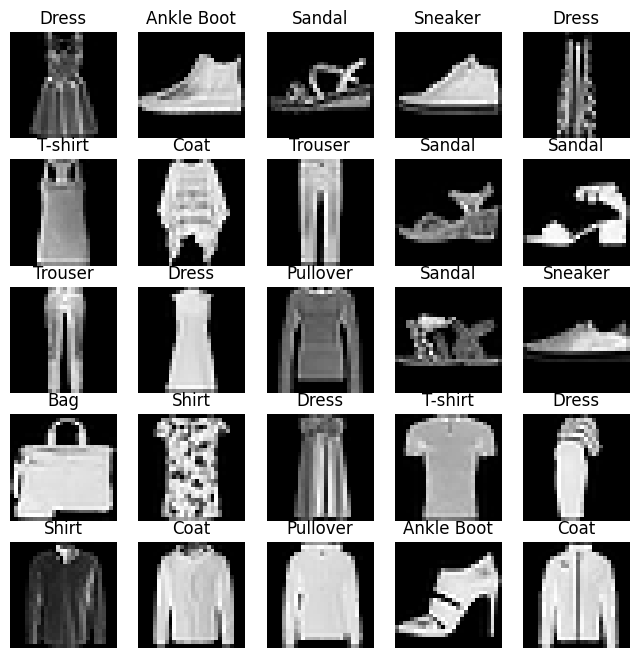

In [33]:
labels_map = {0 : 'T-shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat',
              5 : 'Sandal', 6 : 'Shirt', 7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

fig = plt.figure(figsize=(8,8))  # 출력할 이미지의 가로세로 길이로 ㄱ
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img_xy = np.random.randint(len(train_dataset));
    # np.random.randint()는 이산형 분포를 갖는 데이터에서 무작위 표본을 추출할 때 사용합니다. 
    # 따라서 random.randint(len(train_dataset)) 의미는 0~train_dataset의 길이 값을 갖는 분포에서 랜덤한 숫자 한개를 생성하라는 의미
    img = train_dataset[img_xy][0][0][:,:]  #img = train_dataset[img_xy][0][-1][:,:]과 
    fig.add_subplot (rows, columns,i)
    plt. title(labels_map[train_dataset[img_xy][1]]) 
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [9]:
# test_loader 
# dir(test_loader)
# len(train_dataset)

['_DataLoader__initialized',
 '_DataLoader__multiprocessing_context',
 '_IterableDataset_len_called',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_auto_collation',
 '_dataset_kind',
 '_get_iterator',
 '_index_sampler',
 '_is_protocol',
 '_iterator',
 'batch_sampler',
 'batch_size',
 'check_worker_number_rationality',
 'collate_fn',
 'dataset',
 'drop_last',
 'generator',
 'multiprocessing_context',
 'num_workers',
 'persistent_workers',
 'pin_memory',
 'pin_memory_device',
 'prefetch_factor',
 'sampler',
 'timeout',
 'worker_init_fn']